In [1]:
#Importando os pacotes das bibliotecas
import pandas as pd
import numpy as np

In [2]:
#Carregando a base de dados
data = pd.read_pickle("base_treinamento_testes.pkl")
data.head()

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
4146,-5433147389500583028,0.0,INDUSTRIAL TRAINEE,ENGENHARIA QUIMICA,JUNIOR/TRAINEE,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SALVADOR,2.0,1.0,6.450,0.000,6.25,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4147,-5433147389500583028,1500.0,DESENVOLVIMENTO ENGENHEIRO PRO,ADMINISTRACAO DE EMPRESAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,1.0,8.000,0.000,7.99,8.20,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4148,-5433147389500583028,2050.0,CLIENTE ESTAGIO QUALIDADE,ENGENHARIA DE PRODUCAO,ESTAGIO,FORMACAO SUPERIOR COMPLETA,ARUJA,2.0,0.0,3.875,0.000,5.33,5.40,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4149,-5433147389500583028,0.0,CONTA EXECUTIVO PARCERIA,MARKETING,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,3.0,0.0,7.250,0.000,7.99,6.25,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4150,-5433147389500583028,1890.0,CICLO PDCA,MARKETING,AUXILIAR/OPERACIONAL,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,3.0,4.0,5.250,6.375,6.65,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0


In [3]:
#Obter as dimensões do dataframe
data.shape

(25699, 18)

In [4]:
#Verificando linhas duplicadas
data.duplicated().sum()

113

In [5]:
#Removendo os dados duplicados
data = data.drop_duplicates()

In [6]:
#Verificando,novamente se há linhas duplicadas
data.duplicated().sum()

0

In [7]:
#Varificando dados nulos no dataset
data.isnull().sum()

codigo_vaga                             0
ultimo_salario_candidato                0
ultimo_cargo_candidato                  0
area_interesse_candidato             3707
nivel_candidato                       526
formacao_candidato                      0
cidade_candidato                        6
nivel_ingles_candidato                  0
nivel_espanhol_candidato                0
mediana_teste_ingles_candidato          0
mediana_teste_espanhol_candidato        0
mediana_teste_logica_candidato          0
mediana_teste_outros_candidato          0
cargo_vaga                           3207
nivel_vaga                              0
formacao_vaga                           0
cidade_vaga                         17028
aprovado_vaga                           0
dtype: int64

In [8]:
#Eliminadas todas as linhas relativas à celula contendo o valor ausente
data1 = data.dropna(axis=0)
data1.isnull().sum()

codigo_vaga                         0
ultimo_salario_candidato            0
ultimo_cargo_candidato              0
area_interesse_candidato            0
nivel_candidato                     0
formacao_candidato                  0
cidade_candidato                    0
nivel_ingles_candidato              0
nivel_espanhol_candidato            0
mediana_teste_ingles_candidato      0
mediana_teste_espanhol_candidato    0
mediana_teste_logica_candidato      0
mediana_teste_outros_candidato      0
cargo_vaga                          0
nivel_vaga                          0
formacao_vaga                       0
cidade_vaga                         0
aprovado_vaga                       0
dtype: int64

In [9]:
#Contagem da quantidade de registros que temos em cada uma das classes
np.unique(data1['aprovado_vaga'], return_counts = True)

(array([0, 1], dtype=int64), array([4406,  430], dtype=int64))

In [10]:
#Porcentagem da quantidade de registros que temos em cada uma das classes
round(data['aprovado_vaga'].value_counts(normalize=True)*100,2)

0    90.17
1     9.83
Name: aprovado_vaga, dtype: float64

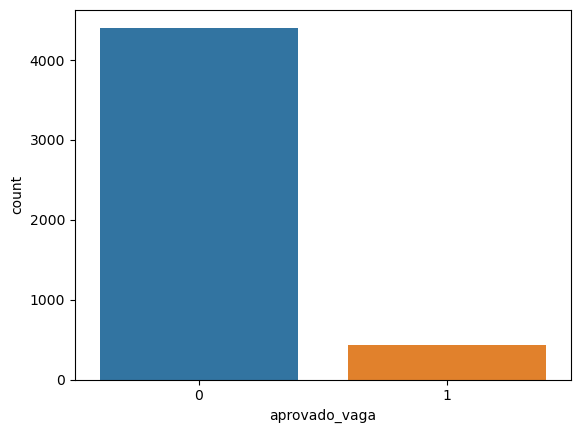

In [11]:
#Representação gráfica das classes
import seaborn as sns

sns.countplot(x = data1["aprovado_vaga"]);

In [ ]:
#O valor 1 é relativo a candidatos que foram aprovados e o valor 0 (zero) a candidatos não aprovados
#Perceba que temos uma base de dados desbalanceada. Em que a quantidade de registro de uma classe é maior que a outra

In [12]:
#Imprime informações sobre um DataFrame, incluindo o tipo de índice e colunas, valores não nulos e uso de memória.
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4836 entries, 8362 to 47879
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   codigo_vaga                       4836 non-null   int64  
 1   ultimo_salario_candidato          4836 non-null   float64
 2   ultimo_cargo_candidato            4836 non-null   object 
 3   area_interesse_candidato          4836 non-null   object 
 4   nivel_candidato                   4836 non-null   object 
 5   formacao_candidato                4836 non-null   object 
 6   cidade_candidato                  4836 non-null   object 
 7   nivel_ingles_candidato            4836 non-null   float64
 8   nivel_espanhol_candidato          4836 non-null   float64
 9   mediana_teste_ingles_candidato    4836 non-null   float64
 10  mediana_teste_espanhol_candidato  4836 non-null   float64
 11  mediana_teste_logica_candidato    4836 non-null   float64
 12  me

In [16]:
#Divisão entre previsores e classes
X_data = data1.iloc[:, 7:13]
X_data.head()

,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato
8362,4.0,4.0,7.980,8.5,8.335,7.95
8363,3.0,4.0,6.330,0.0,7.200,4.90
8364,3.0,1.0,6.000,0.0,8.660,8.20
8365,3.0,1.0,5.970,5.0,5.750,4.00
8366,4.0,0.0,8.125,0.0,6.650,6.00


In [17]:
y_data = data1.iloc[:,17]
y_data.head()

8362    1
8363    0
8364    0
8365    0
8366    0
Name: aprovado_vaga, dtype: int64

In [23]:
#Separando a base de dados utilizando a técnica hold-out
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)


In [29]:
#Acerto o desiquilibrio da base de dados utilizando a técnica oversampling
from imblearn.over_sampling import SMOTE

#resamplig precisa ser feito apenas no conjunto de dados de treinamento
smote = SMOTE(sampling_strategy = "minority", random_state = 42)
X_train_resampling, y_train_resampling = smote.fit_resample(X_train, y_train)

In [31]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(X_train_resampling, y_train_resampling)
pred = sgdc.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1321
           1       0.15      0.12      0.13       130

    accuracy                           0.86      1451
   macro avg       0.53      0.53      0.53      1451
weighted avg       0.85      0.86      0.85      1451

0.8635423845623708


In [40]:
from sklearn.metrics import confusion_matrix

# Matriz de confusão
cf_matrix = confusion_matrix(y_test, pred)
cf_matrix

array([[1238,   83],
       [ 115,   15]], dtype=int64)

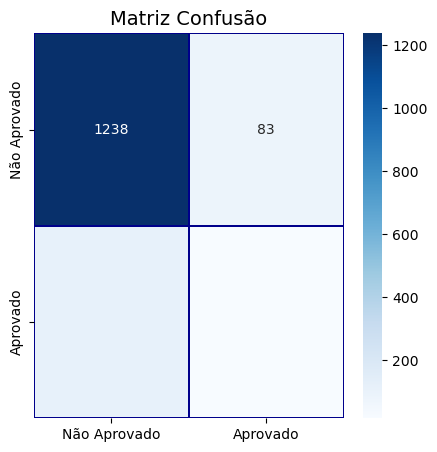

In [41]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cf_matrix, 
            xticklabels=['Não Aprovado', 'Aprovado'],
            yticklabels=['Não Aprovado', 'Aprovado'],
            fmt='d',
            annot=True,
            ax = ax1,
            linewidths=.2,
            linecolor="Darkblue",
            cmap="Blues")

plt.title('Matriz Confusão', fontsize=14)
plt.show()

In [38]:
#
import joblib
joblib.dump(sgdc, "modelo.pkl")

['modelo.pkl']